In [36]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install gradio 

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [5]:
# Step 2: Load Dataset
df = pd.read_csv("employee attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Exploratory data analysis 

In [6]:
df.shape

(1470, 35)

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [9]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
df.duplicated().any()

np.False_

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
df.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

# Step 4: Visualization

C:\Users\MANYA PT\AppData\Local\Temp\ipykernel_9136\640719540.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='coolwarm')


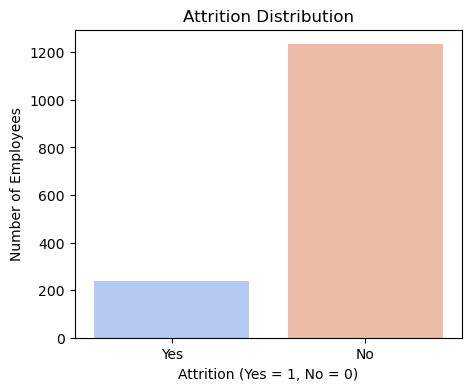

In [14]:

plt.figure(figsize=(5,4))
sns.countplot(x='Attrition', data=df, palette='coolwarm')
plt.title("Attrition Distribution")
plt.xlabel("Attrition (Yes = 1, No = 0)")
plt.ylabel("Number of Employees")
# plt.tight_layout()
plt.show()


# representing the correlation of data values graphically 

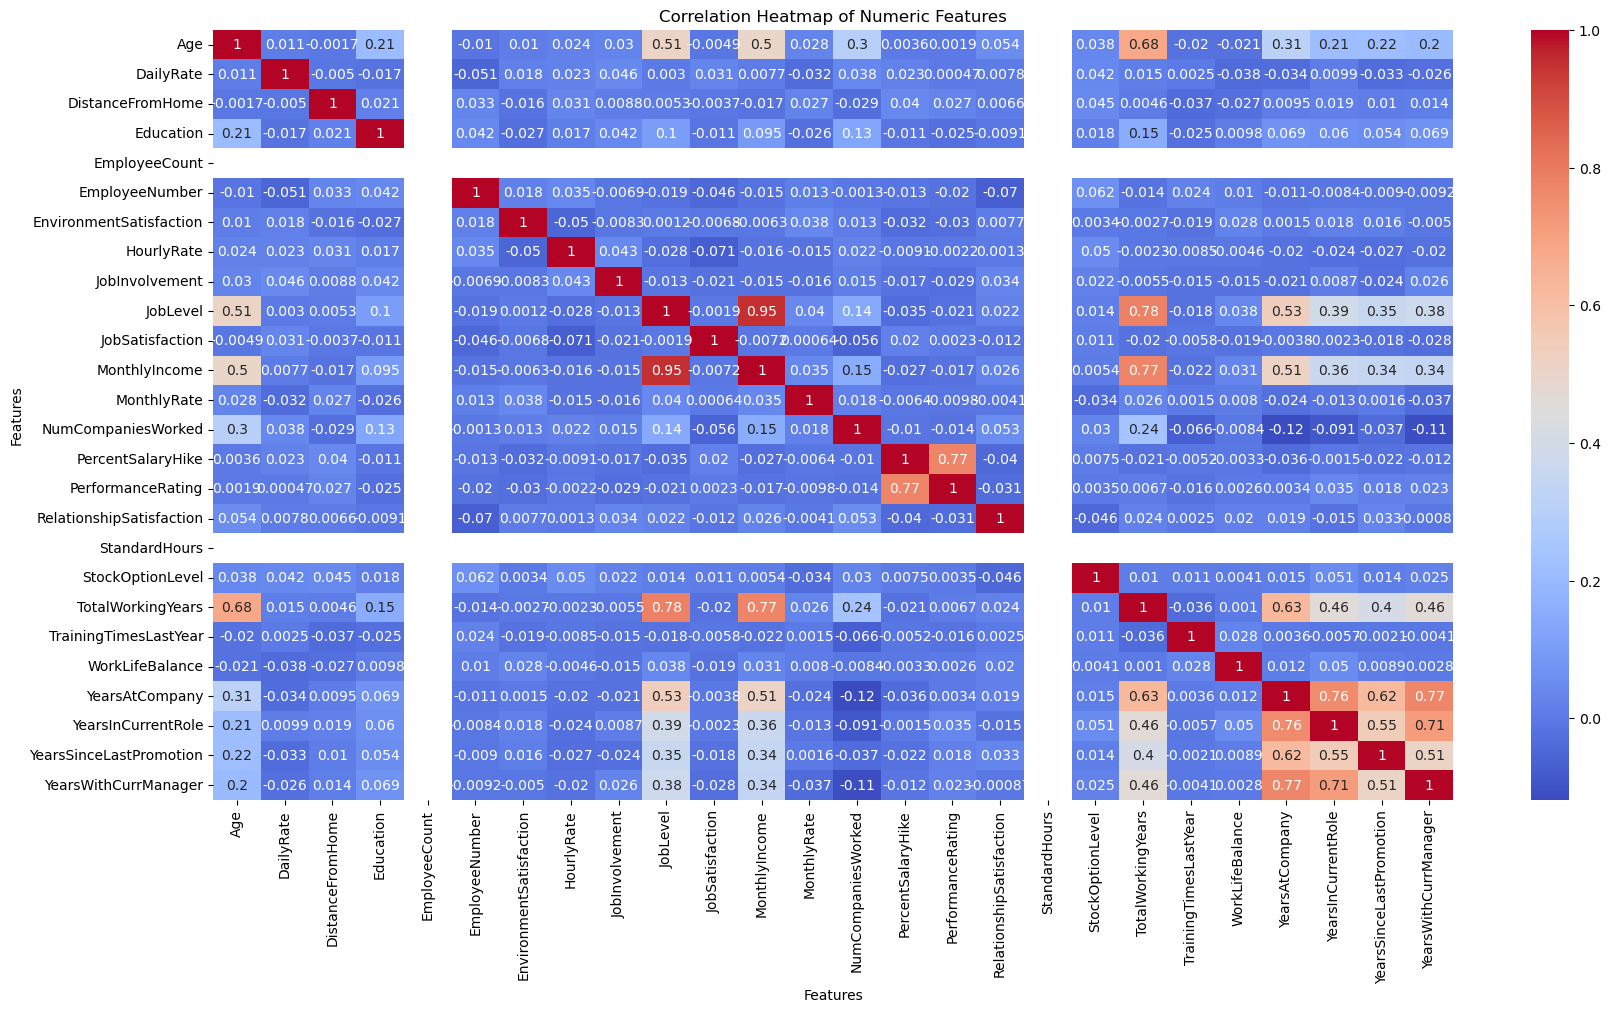

In [15]:
# Step 5: Simple Correlation Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(numeric_only=True), 
            annot=True, 
            cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()


C:\Users\MANYA PT\AppData\Local\Temp\ipykernel_9136\2057687355.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='coolwarm')


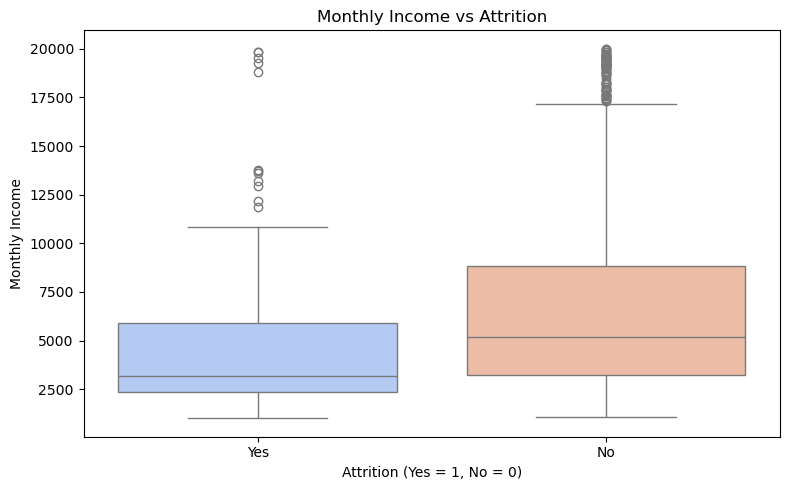

In [16]:
# Step 6: Boxplot - Monthly Income vs Attrition
plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='coolwarm')
plt.title("Monthly Income vs Attrition")
plt.xlabel("Attrition (Yes = 1, No = 0)")
plt.ylabel("Monthly Income")
# plt.tight_layout()
plt.show()


In [17]:
# Step 1: Remove outliers using IQR
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define valid range
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter dataset
df_no_outliers = df[(df['MonthlyIncome'] >= lower_limit) & (df['MonthlyIncome'] <= upper_limit)]

print(f"Original Shape: {df.shape}")
print(f"After Removing Outliers: {df_no_outliers.shape}")



Original Shape: (1470, 35)
After Removing Outliers: (1356, 35)


In [18]:
# Step 5: Drop unwanted columns 
df.drop("EmployeeCount", axis='columns', inplace=True)
df.drop("EmployeeNumber", axis='columns', inplace=True)
df.drop("Over18", axis='columns', inplace=True)
df.drop("StandardHours", axis='columns', inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [19]:
# # Step 6: Manual Label Encoding 
# le = LabelEncoder()

# df['Attrition'] = le.fit_transform(df['Attrition'])
# df['Gender'] = le.fit_transform(df['Gender'])
# df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
# df['Department'] = le.fit_transform(df['Department'])
# df['EducationField'] = le.fit_transform(df['EducationField'])
# df['JobRole'] = le.fit_transform(df['JobRole'])
# df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
# df['OverTime'] = le.fit_transform(df['OverTime'])
# df

# Create separate encoders for each categorical column
from sklearn.preprocessing import LabelEncoder

enc_attrition = LabelEncoder()
enc_gender = LabelEncoder()
enc_bt = LabelEncoder()
enc_dept = LabelEncoder()
enc_ef = LabelEncoder()
enc_job = LabelEncoder()
enc_ms = LabelEncoder()
enc_ot = LabelEncoder()

df['Attrition'] = enc_attrition.fit_transform(df['Attrition'])
df['Gender'] = enc_gender.fit_transform(df['Gender'])
df['BusinessTravel'] = enc_bt.fit_transform(df['BusinessTravel'])
df['Department'] = enc_dept.fit_transform(df['Department'])
df['EducationField'] = enc_ef.fit_transform(df['EducationField'])
df['JobRole'] = enc_job.fit_transform(df['JobRole'])
df['MaritalStatus'] = enc_ms.fit_transform(df['MaritalStatus'])
df['OverTime'] = enc_ot.fit_transform(df['OverTime'])
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [20]:
# Step 7: Split dataset
X = df.drop("Attrition", axis='columns')
y = df['Attrition']
X
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# model fitting 



In [22]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [23]:
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print(" Decision Tree Accuracy:", dt_acc)

 Decision Tree Accuracy: 0.7993197278911565


In [24]:
print(classification_report(y_test, dt_pred))
cm = confusion_matrix(y_test, dt_pred)
cm

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       255
           1       0.24      0.23      0.23        39

    accuracy                           0.80       294
   macro avg       0.56      0.56      0.56       294
weighted avg       0.80      0.80      0.80       294



array([[226,  29],
       [ 30,   9]])

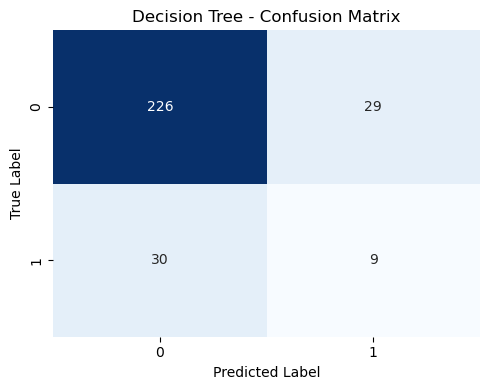

In [25]:

# Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [26]:
# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [27]:
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_acc)
print(classification_report(y_test, rf_pred))
cm_rf = confusion_matrix(y_test, rf_pred)
cm_rf

Random Forest Accuracy: 0.8775510204081632
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



array([[254,   1],
       [ 35,   4]])

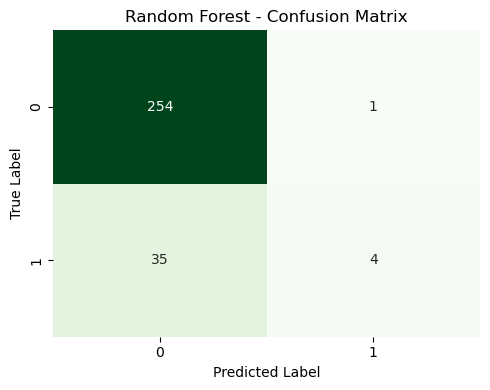

In [28]:
# Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [29]:
# # XGBoost
# xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# xgb.fit(X_train, y_train)


In [30]:
# xgb_pred = xgb.predict(X_test)
# xgb_acc = accuracy_score(y_test, xgb_pred)
# print(" XGBoost Accuracy:", xgb_acc)
# print(classification_report(y_test, xgb_pred))
# cm_xgb = confusion_matrix(y_test, xgb_pred)
# cm_xgb

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", xgb_acc)
print(classification_report(y_test,y_pred))
cm_xgb = confusion_matrix(y_test, y_pred)
cm_xgb

C:\Users\MANYA PT\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:23:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Random Forest Accuracy: 0.8707482993197279
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       255
           1       0.53      0.26      0.34        39

    accuracy                           0.87       294
   macro avg       0.71      0.61      0.64       294
weighted avg       0.85      0.87      0.85       294



array([[246,   9],
       [ 29,  10]])

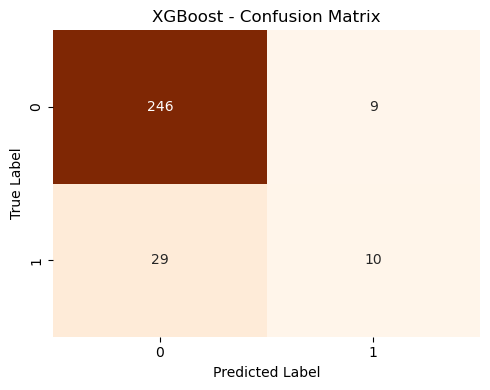

In [31]:

# Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

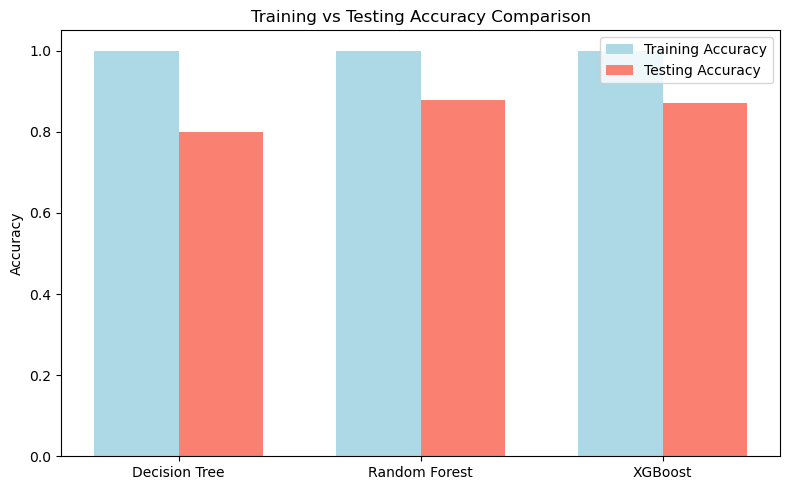

In [32]:

# Step 11: Compare Training and Testing Accuracy
# ----------------------------------------------

# Calculate training accuracies
dt_train_acc = dt.score(X_train, y_train)
rf_train_acc = rf.score(X_train, y_train)
xgb_train_acc = xgb.score(X_train, y_train)

# Store accuracies
models = ["Decision Tree", "Random Forest", "XGBoost"]
train_scores = [dt_train_acc, rf_train_acc, xgb_train_acc]
test_scores = [dt_acc, rf_acc, xgb_acc]

# Plot
plt.figure(figsize=(8,5))
bar_width = 0.35
x = np.arange(len(models))

plt.bar(x - bar_width/2, train_scores, width=bar_width, color='lightblue', label='Training Accuracy')
plt.bar(x + bar_width/2, test_scores, width=bar_width, color='salmon', label='Testing Accuracy')

plt.xticks(x, models)
plt.ylabel("Accuracy")
plt.title("Training vs Testing Accuracy Comparison")
plt.legend()
plt.tight_layout()
plt.show()


In [33]:
print(X.columns)


Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [34]:
import gradio as gr
import pandas as pd

def predict_attrition(BusinessTravel, Department, EducationField, JobRole,
                      MaritalStatus, OverTime, Age, DailyRate, DistanceFromHome,
                      Education, EnvironmentSatisfaction, Gender, HourlyRate,
                      JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome,
                      MonthlyRate, NumCompaniesWorked, PercentSalaryHike,
                      PerformanceRating, RelationshipSatisfaction,
                      StockOptionLevel, TotalWorkingYears,
                      TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany,
                      YearsInCurrentRole, YearsSinceLastPromotion,
                      YearsWithCurrManager):

    # Try encoding categorical variables
    try:
        bt = enc_bt.transform([BusinessTravel])[0]
        dept = enc_dept.transform([Department])[0]
        ef = enc_ef.transform([EducationField])[0]
        job = enc_job.transform([JobRole])[0]
        ms = enc_ms.transform([MaritalStatus])[0]
        ot = enc_ot.transform([OverTime])[0]
        gender = enc_gender.transform([Gender])[0]
    except:
        return "❌ Please enter valid category values as in dataset."

    # Build DataFrame
    row = pd.DataFrame([[
        Age, bt, DailyRate, dept, DistanceFromHome,
        Education, ef, EnvironmentSatisfaction, gender,
        HourlyRate, JobInvolvement, JobLevel, job,
        JobSatisfaction, ms, MonthlyIncome, MonthlyRate,
        NumCompaniesWorked, ot, PercentSalaryHike,
        PerformanceRating, RelationshipSatisfaction,
        StockOptionLevel, TotalWorkingYears,
        TrainingTimesLastYear, WorkLifeBalance,
        YearsAtCompany, YearsInCurrentRole,
        YearsSinceLastPromotion, YearsWithCurrManager
    ]], columns=X.columns)

    # Prediction
    pred = xgb.predict(row)[0]
    pred_label = enc_attrition.inverse_transform([int(pred)])[0]

    return f"Predicted Employee Attrition: {pred_label}"


# Gradio Interface
iface = gr.Interface(
    fn=predict_attrition,
    inputs=[
        gr.Textbox(label="BusinessTravel"),
        gr.Textbox(label="Department"),
        gr.Textbox(label="EducationField"),
        gr.Textbox(label="JobRole"),
        gr.Textbox(label="MaritalStatus"),
        gr.Textbox(label="OverTime"),
        gr.Number(label="Age"),
        gr.Number(label="DailyRate"),
        gr.Number(label="DistanceFromHome"),
        gr.Number(label="Education"),
        gr.Number(label="EnvironmentSatisfaction"),
        gr.Textbox(label="Gender"),
        gr.Number(label="HourlyRate"),
        gr.Number(label="JobInvolvement"),
        gr.Number(label="JobLevel"),
        gr.Number(label="JobSatisfaction"),
        gr.Number(label="MonthlyIncome"),
        gr.Number(label="MonthlyRate"),
        gr.Number(label="NumCompaniesWorked"),
        gr.Number(label="PercentSalaryHike"),
        gr.Number(label="PerformanceRating"),
        gr.Number(label="RelationshipSatisfaction"),
        gr.Number(label="StockOptionLevel"),
        gr.Number(label="TotalWorkingYears"),
        gr.Number(label="TrainingTimesLastYear"),
        gr.Number(label="WorkLifeBalance"),
        gr.Number(label="YearsAtCompany"),
        gr.Number(label="YearsInCurrentRole"),
        gr.Number(label="YearsSinceLastPromotion"),
        gr.Number(label="YearsWithCurrManager")
    ],
    outputs=gr.Textbox(label="Prediction Result"),
    title="Employee Attrition Predictor",
    description="Enter employee details to predict whether they will leave."
)

iface.launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [33]:
# 📘 Sample Input Data for Employee Attrition Prediction

sample = {
    'Age': 35,
    'DailyRate': 800,
    'DistanceFromHome': 10,
    'Education': 3,
    'EnvironmentSatisfaction': 4,
    'HourlyRate': 65,
    'JobInvolvement': 3,
    'JobLevel': 2,
    'JobSatisfaction': 4,
    'MonthlyIncome': 5000,
    'NumCompaniesWorked': 3,
    'PercentSalaryHike': 15,
    'PerformanceRating': 3,
    'RelationshipSatisfaction': 4,
    'TotalWorkingYears': 10,
    'TrainingTimesLastYear': 3,
    'WorkLifeBalance': 3,
    'YearsAtCompany': 5,
    'YearsInCurrentRole': 3,
    'YearsSinceLastPromotion': 1,
    'YearsWithCurrManager': 4,
    'Gender': 'Male',
    'BusinessTravel': 'Travel_Frequently',
    'Department': 'Sales',
    'EducationField': 'Life Sciences',
    'JobRole': 'Sales Executive',
    'MaritalStatus': 'Married',
    'OverTime': 'Yes'
}

import pandas as pd

# Convert to DataFrame
sample_df = pd.DataFrame([sample])
print(sample_df)


   Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   35        800                10          3                        4   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0          65               3         2                4           5000  ...   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  Gender  \
0                   3                        1                     4    Male   

      BusinessTravel  Department  EducationField          JobRole  \
0  Travel_Frequently       Sales   Life Sciences  Sales Executive   

   MaritalStatus  OverTime  
0        Married       Yes  

[1 rows x 28 columns]
